In [1]:
# Загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA

In [2]:
# Загрузка данных
data =pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Получение краткого описания данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
#Кодировщик
o_e = OrdinalEncoder()

# Перевод текстовых данных в числовые

In [5]:
print(data['Sex'].unique())
data['Sex'] = o_e.fit_transform(data["Sex"].values.reshape(-1,1))
print(data['Sex'].unique())

['M' 'F']
[1. 0.]


In [6]:
print(data['ChestPainType'].unique())
data['ChestPainType'] = o_e.fit_transform(data["ChestPainType"].values.reshape(-1,1))
print(data['ChestPainType'].unique())

['ATA' 'NAP' 'ASY' 'TA']
[1. 2. 0. 3.]


In [7]:
print(data['RestingECG'].unique())
data['RestingECG'] = o_e.fit_transform(data["RestingECG"].values.reshape(-1,1))
print(data['RestingECG'].unique())

['Normal' 'ST' 'LVH']
[1. 2. 0.]


In [8]:
print(data['ExerciseAngina'].unique())
data['ExerciseAngina'] = o_e.fit_transform(data["ExerciseAngina"].values.reshape(-1,1))
print(data['ExerciseAngina'].unique())

['N' 'Y']
[0. 1.]


In [9]:
print(data['ST_Slope'].unique())
data['ST_Slope'] = o_e.fit_transform(data["ST_Slope"].values.reshape(-1,1))
print(data['ST_Slope'].unique())

['Up' 'Flat' 'Down']
[2. 1. 0.]


In [10]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0


In [11]:
# Убираем данные о классификации
new_data = data.iloc[:,:-1]
new_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1.0,3.0,110,264,0,1.0,132,0.0,1.2,1.0
914,68,1.0,0.0,144,193,1,1.0,141,0.0,3.4,1.0
915,57,1.0,0.0,130,131,0,1.0,115,1.0,1.2,1.0
916,57,0.0,1.0,130,236,0,0.0,174,0.0,0.0,1.0


In [12]:
new_data = StandardScaler().fit_transform(new_data)

In [13]:
# pd.DataFrame(data = new_data)

# Метод главных компонент

In [14]:
pca = PCA(n_components = 2)

In [15]:
pr_Component = pca.fit_transform(new_data)
new_DF = pd.DataFrame(data = pr_Component, columns = ['ff','sf'])

In [16]:
final_DF = pd.concat([new_DF, data[['HeartDisease']]], axis = 1)
final_DF.head()

,ff,sf,HeartDisease
0,-2.261181,-0.169797,0
1,-1.137621,-1.097544,1
2,-1.101846,1.167057,0
3,0.980703,-1.113893,1
4,-1.046800,0.395467,0


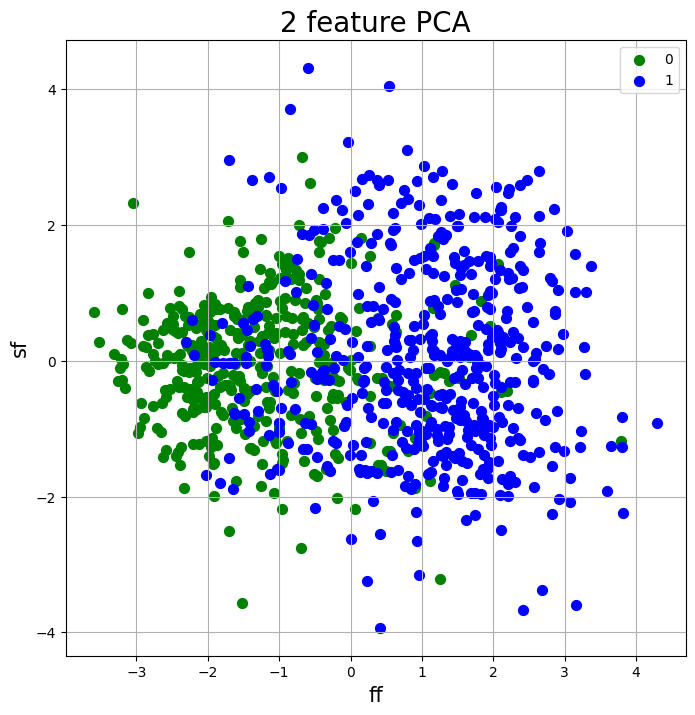

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('ff', fontsize = 15)
ax.set_ylabel('sf', fontsize = 15)
ax.set_title('2 feature PCA', fontsize = 20)

targets = [0, 1]
colors = ['g', 'b']

for target, color in zip(targets, colors):
    idx = final_DF['HeartDisease'] == target
    ax.scatter(final_DF.loc[idx,'ff'], final_DF.loc[idx,'sf'], c = color, s = 50)
ax.legend(targets)
ax.grid()

Main
I do Dx

I do Tx
I do Dx

I do Tx
[array([2]), array([13])]
[ 2 13]
I do Dx

I do Tx
I do Dx

I do Tx
final OMEGA
[array([2]), array([13])]
etalons
qwe


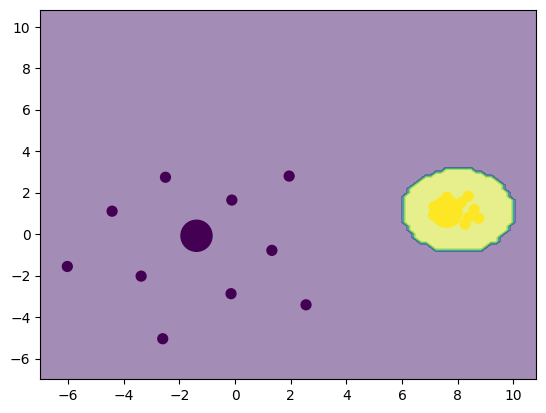

qwe


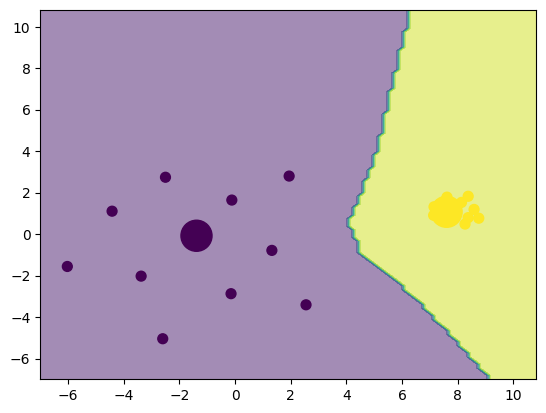

In [18]:
import frisStolp as fS
import dataFris
Xl = new_DF.values
y = final_DF['HeartDisease'].values

In [19]:
fris = fS.FRiSSTOLP(Xl, y, fS.euclidean, 0.5, 0.0)

In [20]:
res = fris.Main()

Main
I do Dx

I do Tx
I do Dx

I do Tx
[array([113]), array([180])]
[113 180]
I do Dx

I do Tx
I do Dx

I do Tx
final OMEGA
[array([605]), array([899])]
I do Dx

I do Tx
I do Dx

I do Tx
I do Dx

I do Tx
I do Dx

I do Tx
I do Dx

I do Tx
I do Dx

I do Tx
I do Dx

I do Tx
I do Dx

I do Tx
I do Dx

I do Tx
I do Dx

I do Tx


In [21]:
U = res[0]
for i in range(1, len(res)):
    U = fS.union(U, res[i])

print("etalons")

etalons


In [23]:
EtaXl = np.array(Xl[U])
EtaY = np.array(y[U])

qwe


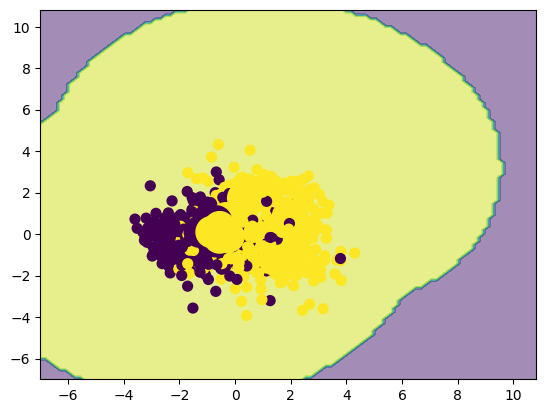

In [27]:
classifierFris = lambda a, b: fS.classify(np.array([a, b]), Xl, y, res)
fS.classification_map(classifierFris, Xl, y)
plt.scatter(Xl[:, 0], Xl[:, 1], c=y, s=50)
plt.scatter(Xl[U, 0], Xl[U, 1], c=y[U], s=500)
plt.show()

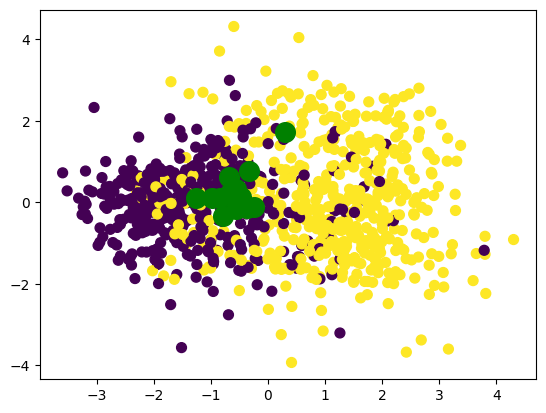

In [48]:
plt.scatter(Xl[:, 0], Xl[:, 1], c=y, s=50)
plt.scatter(Xl[U, 0], Xl[U, 1], c=['g'], s=200)
plt.show()

qwe


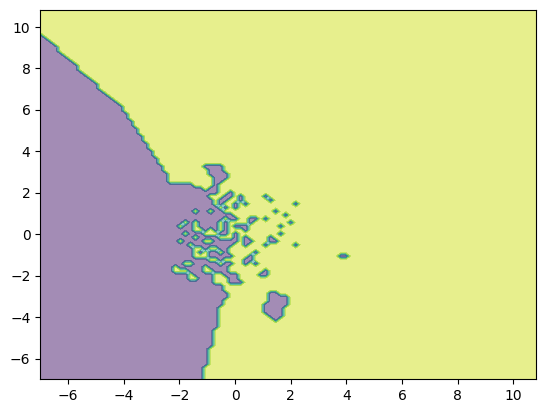

In [51]:
classifierKNN = lambda a, b: fS.KNN(np.array([a, b]), Xl, y)
fS.classification_map(classifierKNN, EtaXl, EtaY)

qwe


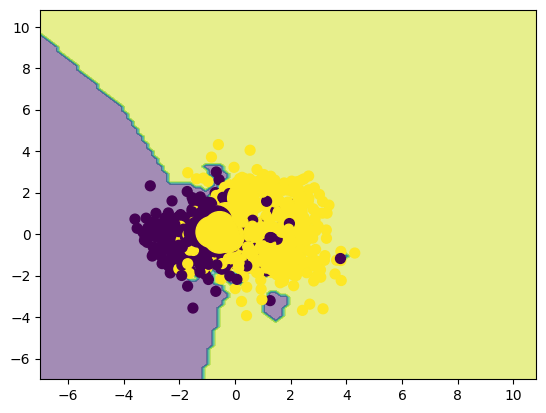

In [53]:
fS.classification_map(classifierKNN, EtaXl, EtaY)
plt.scatter(Xl[:, 0], Xl[:, 1], c=y, s=50)
plt.scatter(Xl[U, 0], Xl[U, 1], c=y[U], s=500)
plt.show()